In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import simtk.openmm as mm
from torsionfit.database import qmdatabase as ScanSet
import torsionfit.model as Model
from torsionfit.backends import sqlite_plus
from pymc import MCMC
from parmed.charmm import CharmmParameterSet
from torsionfit import plots
from matplotlib.backends.backend_pdf import PdfPages
import torsionfit.parameters as par
from collections import OrderedDict
import numpy as np
from pymbar.timeseries import detectEquilibration
import tqdm

In [2]:
param_to_opt=[('CG331', 'CG321', 'CG321', 'CG331')]
param = CharmmParameterSet('../../../../../data/charmm_ff/top_all36_cgenff.rtf', 
                           '../../../../../data/charmm_ff/par_all36_cgenff.prm')
structure = '../../../../structure/butane.psf'
scan = '../../../../torsion_scans/MP2_torsion_scan/'
# Print initial guess

# Create a butane scan with torsions on (to compare for difference potential)
butane_scan = ScanSet.parse_psi4_out(scan, structure)
optimized = butane_scan.remove_nonoptimized()
optimized.compute_energy(param)

# Turn off torsion
param.dihedral_types[('CG331', 'CG321', 'CG321', 'CG331')][1].phi_k=0
param.dihedral_types[('CG331', 'CG321', 'CG321', 'CG331')][0].phi_k=0

# Create butane scan with torsions off
optimized_0 = butane_scan.remove_nonoptimized()
optimized_0.compute_energy(param)

[Psi /Users/sternc1/src/ChayaSt/torsionfit_examples/butane/sampling_torsions/c_c_c_c_torsion/n/10000/../../../../torsion_scans/MP2_torsion_scan/0/butane_0.out2 WARNING] In logfileparser.py, line 468, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/sternc1/src/ChayaSt/torsionfit_examples/butane/sampling_torsions/c_c_c_c_torsion/n/10000/../../../../torsion_scans/MP2_torsion_scan/10/butane_10.out2 WARNING] In logfileparser.py, line 468, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/sternc1/src/ChayaSt/torsionfit_examples/butane/sampling_torsions/c_c_c_c_torsion/n/10000/../../../../torsion_scans/MP2_torsion_scan/20/butane_20.out2 WARNING] In logfileparser.py, line 468, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/sternc1/anaconda/envs/py35/lib/python3.5/site-packages/torsionfit-0+untagged.556.g949a22e-py3.5.egg/torsionfit/database/qmdatabase.py:188: UserWarning: Warning: Optimizer failed for /Users/sternc1/src/ChayaSt/torsionfit_examples/butane/sampling_torsions/c_c_c_c_torsion/n/10000/../../../../torsion_scans/MP2_torsion_scan/10/butane_10.out2
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/sternc1/src/ChayaSt/torsionfit_examples/butane/sampling_torsions/c_c_c_c_torsion/n/10000/../../../../torsion_scans/MP2_torsion_scan/30/butane_30.out2 WARNING] In logfileparser.py, line 468, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/sternc1/src/ChayaSt/torsionfit_examples/butane/sampling_torsions/c_c_c_c_torsion/n/10000/../../../../torsion_scans/MP2_torsion_scan/40/butane_40.out2 WARNING] In logfileparser.py, line 468, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/sternc1/src/ChayaSt/torsionfit_examples/butane/sampling_torsions/c_c_c_c_torsion/n/10000/../../../../torsion_scans/MP2_torsion_scan/50/butane_50.out2 WARNING] In logfileparser.py, line 468, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /U

In [3]:
# Load samplers
dbs = OrderedDict()
for i in range(25):
    dbs['db_{}'.format(i)] = sqlite_plus.load('random_10000_{}/random_10000_{}.sqlite'.format(i, i))

<DihedralTypes [<DihedralType; phi_k=0.165, per=2, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.034, per=6, phase=180.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.099, per=1, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.132, per=3, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.120, per=4, phase=0.000,  scee=1.000, scnb=1.000>]>
<DihedralTypes [<DihedralType; phi_k=0.171, per=2, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=-0.001, per=6, phase=180.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.143, per=1, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.140, per=3, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.118, per=4, phase=0.000,  scee=1.000, scnb=1.000>]>
<DihedralTypes [<DihedralType; phi_k=0.180, per=2, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=-0.017, per=6, phase=180.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.145, per=1, phase=0.000,  scee=

/Users/sternc1/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<DihedralTypes [<DihedralType; phi_k=0.142, per=2, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.012, per=6, phase=180.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.124, per=1, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.128, per=3, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.114, per=4, phase=0.000,  scee=1.000, scnb=1.000>]>
<DihedralTypes [<DihedralType; phi_k=0.156, per=2, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.002, per=6, phase=180.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.138, per=1, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.141, per=3, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.095, per=4, phase=0.000,  scee=1.000, scnb=1.000>]>
<DihedralTypes [<DihedralType; phi_k=0.167, per=2, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.025, per=6, phase=180.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.145, per=1, phase=0.000,  scee=1.

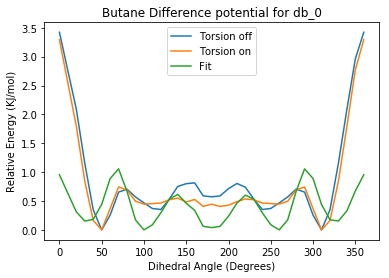

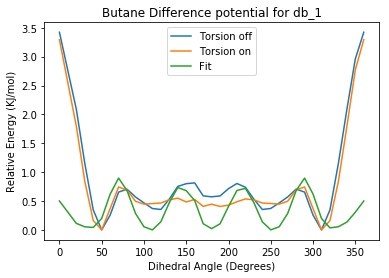

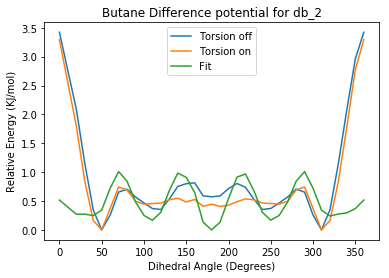

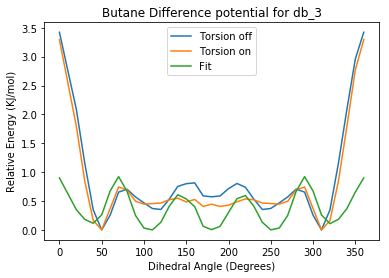

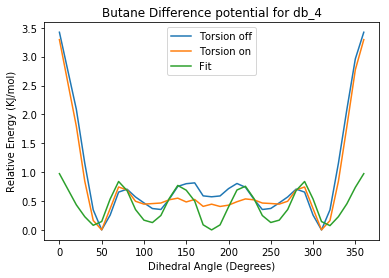

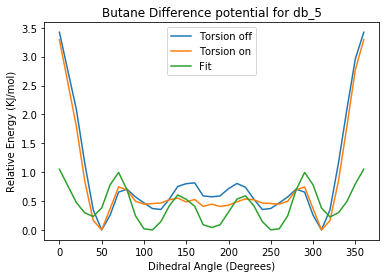

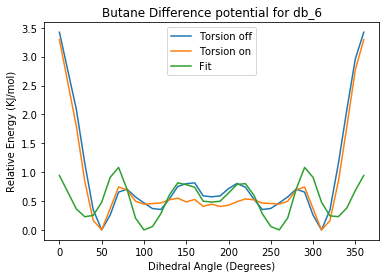

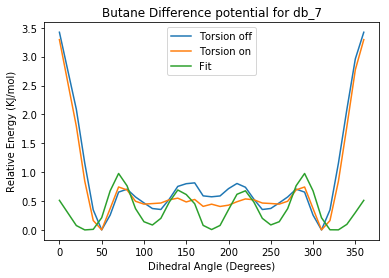

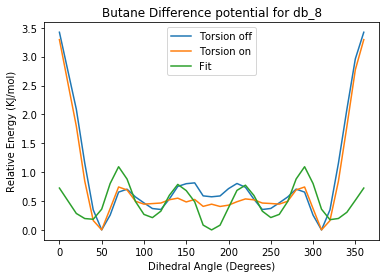

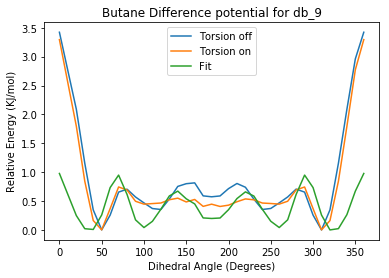

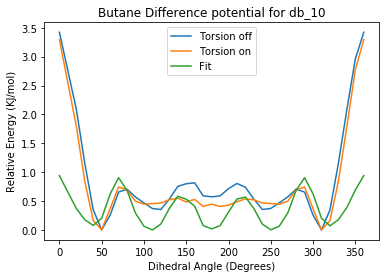

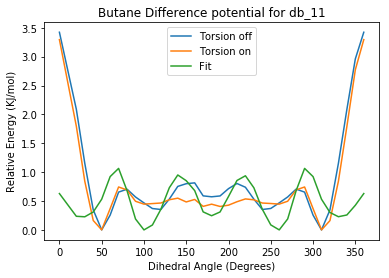

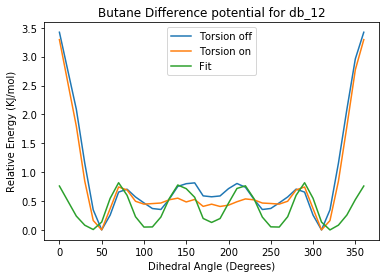

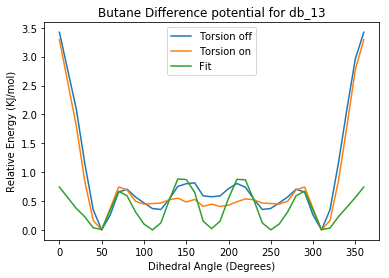

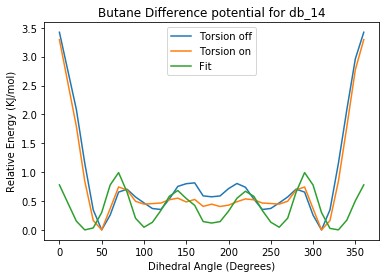

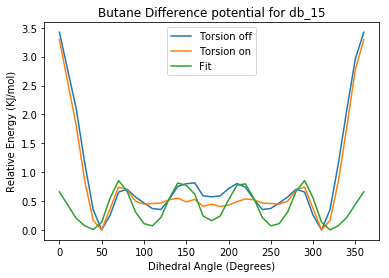

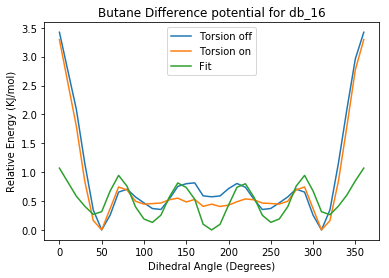

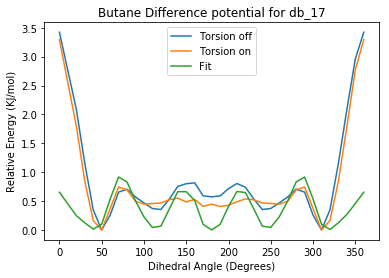

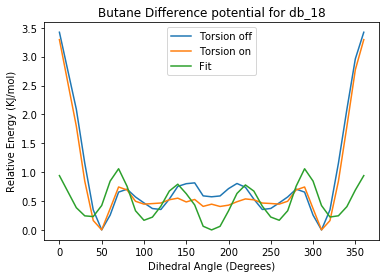

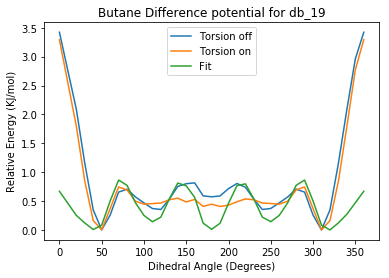

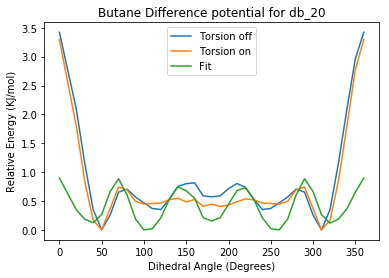

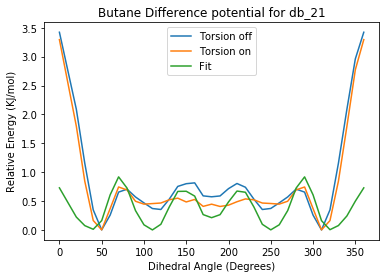

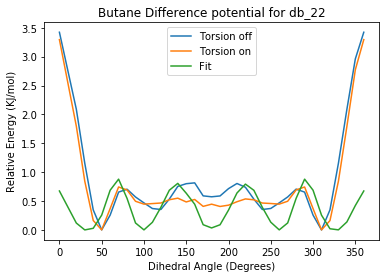

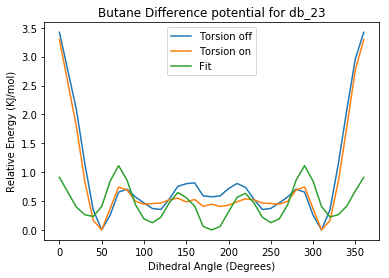

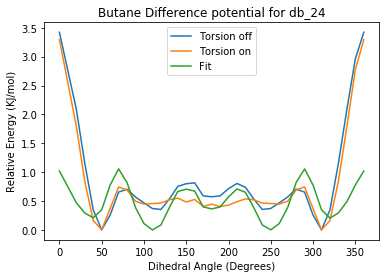

In [5]:
# Difference potential
# look at difference potential
new_param = CharmmParameterSet('../../../../../data/charmm_ff/top_all36_prot.rtf',
                              '../../../../../data/charmm_ff/par_all36_cgenff.prm')
new_struct = butane_scan.remove_nonoptimized()
# parameterize with db_0
par.add_missing(param_list=param_to_opt, param=new_param, sample_n5=False)
with PdfPages('difference_potential.pdf') as pdf:
    # Update parameters
    for db in dbs:
        plt.figure()
        par.update_param_from_sample(param_list=param_to_opt, param=new_param, db=dbs[db], n_5=False, rj=False)

        # Check
        print(new_param.dihedral_types[param_to_opt[0]])    
        new_struct.compute_energy(new_param)
        plt.plot(optimized_0.angles, optimized_0.delta_energy-min(optimized_0.delta_energy), label='Torsion off')
        plt.plot(optimized.angles, optimized.delta_energy-min(optimized.delta_energy), label='Torsion on')
        plt.plot(new_struct.angles, new_struct.delta_energy - min(new_struct.delta_energy), label='Fit')
        plt.legend()
        plt.xlabel('Dihedral Angle (Degrees)')
        plt.ylabel('Relative Energy (KJ/mol)')
        plt.title('Butane Difference potential for {}'.format(db))
        pdf.savefig()

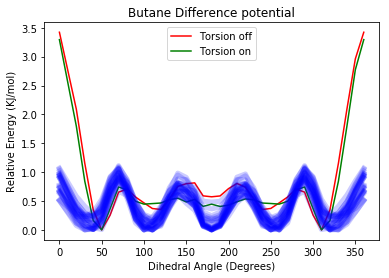

In [7]:
# Difference potential
# look at difference potential
new_param = CharmmParameterSet('../../../../../data/charmm_ff/top_all36_prot.rtf',
                              '../../../../../data/charmm_ff/par_all36_cgenff.prm')
new_struct = butane_scan.remove_nonoptimized()
# parameterize with db_0
par.add_missing(param_list=param_to_opt, param=new_param, sample_n5=False)
with PdfPages('difference_potential_all.pdf') as pdf:
    # Update parameters
    plt.plot(optimized_0.angles, optimized_0.delta_energy-min(optimized_0.delta_energy), label='Torsion off', color='red')
    plt.plot(optimized.angles, optimized.delta_energy-min(optimized.delta_energy), label='Torsion on', color='green')
    for db in dbs:
        par.update_param_from_sample(param_list=param_to_opt, param=new_param, db=dbs[db], n_5=False, rj=False)

        # Check
        new_struct.compute_energy(new_param)
        plt.plot(new_struct.angles, new_struct.delta_energy - min(new_struct.delta_energy), color='blue', alpha=0.2,
                linewidth=5)
        plt.xlabel('Dihedral Angle (Degrees)')
        plt.ylabel('Relative Energy (KJ/mol)')
        plt.title('Butane Difference potential')
    plt.legend()
    pdf.savefig()


/Users/sternc1/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


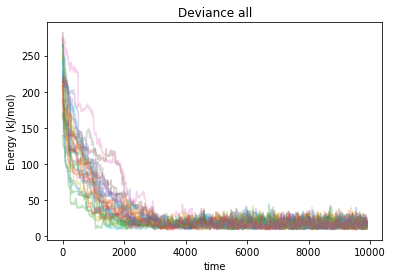

In [8]:
with PdfPages('deviance_all.pdf') as pdf:
    for i, db in enumerate(dbs):
        plt.plot(dbs[db].deviance[100:], alpha=0.3)
        #plt.axvline(t_dev[i,0], color='red')
        #plt.text(t_dev[i, 0]+10, 8, r'$t_{equil}$', color='red', fontsize=20)
        plt.legend()
        plt.xlabel('time')
        plt.ylabel('Energy (kJ/mol)')
    plt.title("Deviance all")
    pdf.savefig()

/Users/sternc1/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


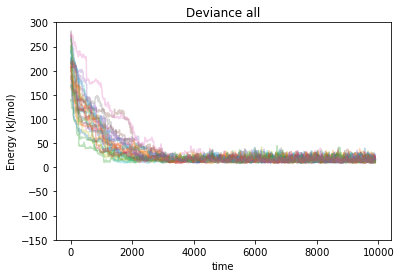

In [15]:
for i, db in enumerate(dbs):
    plt.plot(dbs[db].deviance[100:], alpha=0.3)
    #plt.axvline(t_dev[i,0], color='red')
    #plt.text(t_dev[i, 0]+10, 8, r'$t_{equil}$', color='red', fontsize=20)
    plt.legend()
    plt.xlabel('time')
    plt.ylabel('Energy (kJ/mol)')
    plt.ylim(-150, 300)
plt.title("Deviance all")
plt.savefig('deviance_all.png')